In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
est = pd.read_csv("/content/malnutrition-estimates.csv")
avg_data =pd.read_csv("/content/country-wise-average.csv")

Some terms related to malnutrition
wasting:
Low weight-for-height is known as wasting. It usually indicates recent and severe weight loss, because a person has not had enough food to eat and/or they have had an infectious disease.

severe wasting :
This is characterized by a massive loss of body fat and muscle tissue. Children who are severely wasted look almost elderly and their bodies are extremely thin and skeletal.

stunting :
Stunting is when a child has a low height for their age, usually due to malnutrition, repeated infections, and/or poor social stimulation.If stunting is a low height for a child's weight, wasting is low weight for a child's height.

Underweight :
Children with low weight-for-age are known as underweight. A child who is underweight may be stunted, wasted, or both.

Overweight:
Overweight and obesity is when a person is too heavy for his or her height.

In [12]:
df=est.copy()
est.isnull().any()

Unnamed: 0               False
ISO code                 False
Country                  False
Survey Year              False
Year                     False
Income Classification    False
LDC                      False
LIFD                     False
LLDC or SID2             False
Survey Sample (N)         True
Severe Wasting            True
Wasting                   True
Overweight                True
Stunting                  True
Underweight               True
Notes                     True
Report Author            False
Source                   False
Short Source             False
U5 Population ('000s)    False
dtype: bool

In [13]:
 #Replacing NaN values of some columns with zero
df['Severe Wasting']= df['Severe Wasting'].fillna(0.0)
df['Wasting'] = df['Wasting'].fillna(0.0)
df['Overweight'] = df['Overweight'].fillna(0.0)
df['Stunting'] = df['Stunting'].fillna(0.0)
df['Underweight'] = df['Underweight'].fillna(0.0)

Observations from this plotting:
A significant % of children still have 'Stunting','Underweight' and 'Wasting' undernutrition problems in our country.

There is a huge decrease in 'Stunting %' (from 65% to 35%) and 'Underweight %'(from 55% to 38%) over the years. 'Overweight %' is very less in the country around 2-3%. Also, only 5% children suffer from 'Severe Wasting' in the country.

But the most strange pattern we can observe here is that there is a very little change in 'Wasting %' over the years.

-> Malnutrition across different income groups
undernutrition categories :
stunting, wasting, overweight, Underweight, and severe wasting

Income Classification:
Low income = 0, Lower middle income = 1, Upper middle income = 2, High income = 3,

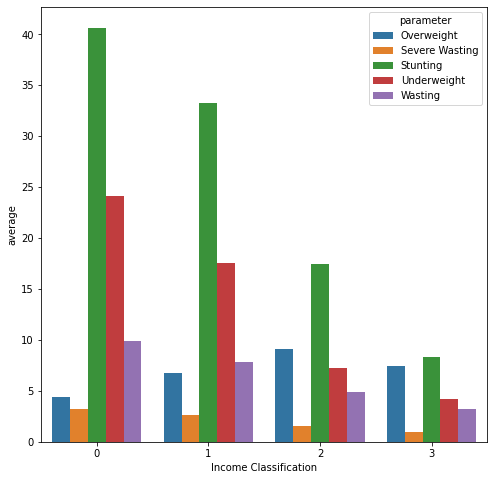

In [15]:
data =pd.DataFrame(columns =['parameter','Income Classification','average'])

for param in param_list:
    for i in range(4):
        #value=df.loc[df['Income Classification']==i][param].mean()
        value = avg_data.loc[avg_data['Income Classification']==i][param].mean()
        value_dict = {'parameter':param,'Income Classification':i,'average':value}
        data = pd.concat([data, pd.DataFrame(data=[value_dict])])
        #data = pd.concat([data, pd.DataFrame.from_records([value_dict])])
        

plt.figure(figsize =(8,8))
sns.barplot(data =data, x='Income Classification', y='average', hue='parameter')
plt.show()

Observations from this plotting:
Every country in the world is affected by one or more forms of malnutrition.
We can observe that 'Stunting %' and 'Underweight %' is very high in LOW and LOWER MIDDLE income countries. Whereas 'Overweight %' is comparatively higher in UPPER MIDDLE and HIGH income countries.

'Wasting %' and 'Severe Wasting %' is also higher in LOW and LOWER MIDDLE income countries.

Overall we can see that LOW and LOWER MIDDLE income countries are the ones which are most affected by malnutrition.

-> Analysis of countries which are both LDC and LIFD
based on recent survey (survey year= 2018 or 2019)
Low Income Food Deficient (LIFD)(true=1, false=0) , Least Developed Countries (LDC)(true=1, false=0)

Our data, malnutrition-estimates.csv has recent survey of only 32 countries

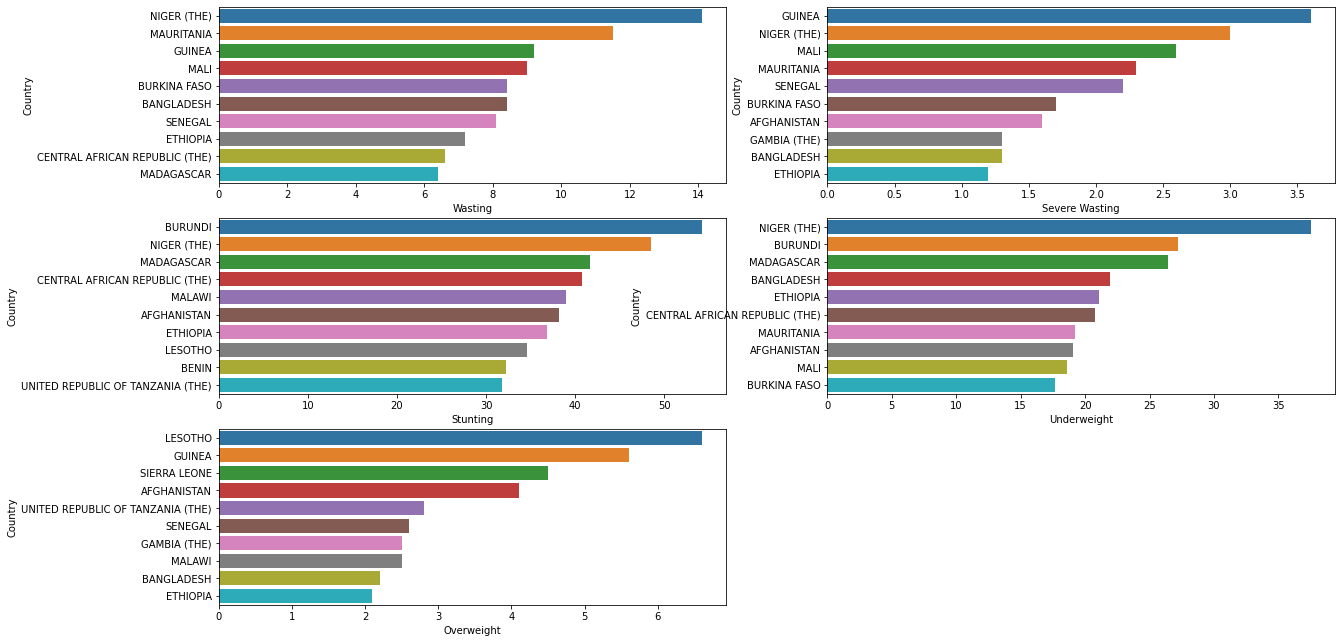

In [16]:
df = df.loc[df.Year >=2018]
temp = df.loc[(df.LDC == 1) & (df.LIFD ==1)]

# 10 contries in which Stunting percentage is highest
stunting_df = temp.sort_values(by='Stunting', ascending =False).head(10)
underweight_df =temp.sort_values(by='Underweight', ascending =False).head(10)
overweight_df=temp.sort_values(by='Overweight', ascending =False).head(10)
severe_wasting_df=temp.sort_values(by='Severe Wasting', ascending =False).head(10)
wasting_df =temp.sort_values(by='Wasting', ascending =False).head(10)

fig =plt.figure(figsize = (20,11))
ax1 = fig.add_subplot(3,2,1)
ax2 =fig.add_subplot(3,2,2)
ax3 =fig.add_subplot(3,2,3)
ax4 =fig.add_subplot(3,2,4)
ax5 =fig.add_subplot(3,2,5)

sns.barplot(data =wasting_df,ax=ax1, y='Country', x='Wasting', orient='h')
sns.barplot(data =severe_wasting_df,ax=ax2, y='Country', x='Severe Wasting', orient='h')
sns.barplot(data =stunting_df,ax=ax3, y='Country', x='Stunting', orient='h')
sns.barplot(data =underweight_df,ax=ax4, y='Country', x='Underweight', orient='h')
sns.barplot(data =overweight_df,ax=ax5, y='Country', x='Overweight', orient='h')
plt.show()

Observations from this plotting:
countries which are most affected from malnutrition are:
Niger, Ethiopia, Afganistan, Mauritania, Guinea, Mali, Burkina Faso, Bangaldesh, Senegal, Central African Republic, Madagascar

Highest % of undernutrition categories:
Stunting: 56%, Wasting: 14%, Severe Wasting: 36%, Underweight: 37%, Overweight: 6.8% Overweight % is very less in such countries(<=8%)

-> Malnutrition in LLDCs and SIDSs:
Land Locked Developing Countries (LLDC) ('LLDC or SID2' =1), Small Island Developing States (SIDS) ('LLDC or SID2'= 2),

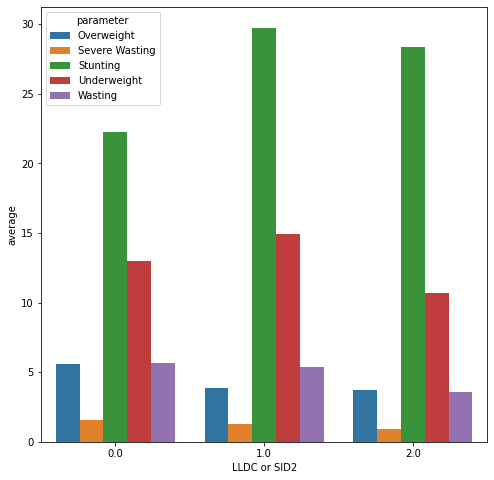

In [17]:
df = est.copy()
df = df.loc[df.Year >=2017]
data2 =pd.DataFrame(columns =['parameter','LLDC or SID2','average'])

for param in param_list:
    for i in [0.0,1.0,2.0]:
        #value=df.loc[df['Income Classification']==i][param].mean()
        value=df.loc[df['LLDC or SID2']==i][param].mean()
        value_dict = {'parameter':param,'LLDC or SID2':i,'average':value}
        
        data2 = pd.concat([data2, pd.DataFrame(data=[value_dict])])
        #data = pd.concat([data, pd.DataFrame.from_records([value_dict])])
        
#sns.factorplot(data =data, y='average', x='parameter', col='Income Classification', kind='bar')
plt.figure(figsize =(8,8))
sns.barplot(data =data2,  y='average', x='LLDC or SID2', hue='parameter')
plt.show()

# Recent surveys do not have data about SID countries

Observations from this plotting:
LLDC countries have a higher percentange of 'Stunting' undernutrition ( about 30% of the children suffer from 'Stunting'). 'Severe Wasting %' and 'Overweight %' are very less in LLDC countries. About 16% children are 'Underweighted'.

-> Countries which are very less affected from malnutrition
Countries in which percentage of undernutrition parameter is very less or closed to zero.

In [18]:
avg_data.sort_values(by=['Severe Wasting','Stunting','Wasting','Underweight','Overweight']).head(6)

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
6,AUSTRALIA,3.0,0.00,0.000000,13.875000,1.000000,0.10,1443.074500
143,UNITED STATES OF AMERICA (THE),3.0,0.04,0.514286,7.414286,2.914286,0.88,20077.909571
53,GERMANY,3.0,0.10,0.650000,3.350000,1.500000,0.80,3641.690000
108,REPUBLIC OF KOREA (THE),3.0,0.15,1.050000,6.750000,2.500000,0.80,2487.097000
66,JAPAN,3.0,0.20,2.300000,1.500000,7.100000,3.40,5554.144000
4,ARGENTINA,2.0,0.20,2.150000,11.125000,10.025000,2.60,3613.651750


In [19]:
avg_data.sort_values(by=['Severe Wasting','Stunting','Wasting','Underweight','Overweight'], ascending =False).head(10)

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
124,SOUTH SUDAN,0.0,11.400000,23.650000,8.450000,33.750000,30.100000,1459.262500
40,DJIBOUTI,1.0,9.400000,17.075000,8.250000,30.075000,22.625000,99.445250
61,INDIA,1.0,6.116667,18.766667,2.933333,49.055556,42.977778,123014.491000
28,CHAD,0.0,5.500000,15.240000,3.040000,41.260000,31.400000,2024.290400
32,COMOROS (THE),1.0,5.400000,10.125000,12.466667,39.125000,19.575000,90.287750
149,YEMEN,0.0,5.300000,15.242857,4.842857,51.900000,37.785714,3269.476000
129,SYRIAN ARAB REPUBLIC (THE),0.0,5.050000,9.566667,17.825000,28.550000,10.050000,2476.209333
132,TIMOR-LESTE,1.0,4.775000,15.620000,3.650000,55.380000,42.800000,160.444800
127,SUDAN (THE),1.0,4.766667,15.400000,2.900000,36.866667,29.933333,5551.013000
81,MALDIVES,2.0,4.725000,15.780000,4.660000,32.600000,30.320000,36.045400
